# Data wrangling and exploration

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [27]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [28]:
# Load datasets
data_folder = './data/'
modified_data_folder = './modified_data/'

headers_character_metadata = ['Wikipedia Movie ID', 'Freebase Movie ID','Movie release date', 'Character name', 'Actor DOB', 
                              'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor name',
                              'Actor age at movie release', 'Freebase character map', 'Freebase character ID', 'Freebase actor ID']
character_metadata = pd.read_csv(data_folder + 'character.metadata.tsv', sep='\t', names=headers_character_metadata)


movie_metadata = pd.read_csv(modified_data_folder +'movie_metadata_TMDB_FINAL.csv', sep=',')
movie_metadata.rename(columns={'Movie box office revenue enriched':'Movie box office revenue'}, inplace=True)

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_48560/317216633.py:11: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv(modified_data_folder +'movie_metadata_TMDB_FINAL.csv', sep=',')


In [29]:
# Add a column of release year to get consistency
character_metadata['Movie release year'] = character_metadata['Movie release date'].str.split('-').str[0].astype('float')
movie_metadata['Movie release year'] = movie_metadata['Movie release date'].str.split('-').str[0].astype('float')

# Add a column of birth year to get consistency
character_metadata['Actor birth year'] = character_metadata['Actor DOB'].str.split('-').str[0].astype('float')


## Remove outliers

### Character dataset

Now we look more closely at each attribute and remove unrealistic values. We first take a look at **Movie release year**:

In [30]:
# Define function that print the minimum and maximum values of a defines variable in the data frame
def get_min_and_max(df, variable_name, no_min, no_max):
    array = df[variable_name].fillna(0).unique()
    sorted_array = np.sort(array)
    
    min_values = sorted_array[:no_min]
    max_values = sorted_array[-no_max:]
    
    print(f"{no_min} minimum values of '{variable_name}':")
    print(min_values)

    print(f"{no_max} maximum values of '{variable_name}':")
    print(max_values)


In [31]:
character_metadata

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map,Freebase character ID,Freebase actor ID,Movie release year,Actor birth year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001.0,1958.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,1974.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,1969.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,1967.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,1977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992.0,1970.0
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992.0,1965.0
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957.0,1941.0
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957.0,NaN


In [32]:
# Find all unique years as sort them
get_min_and_max(df=character_metadata, variable_name='Movie release year', no_min=5, no_max=5)

5 minimum values of 'Movie release year':
[   0. 1010. 1888. 1891. 1893.]
5 maximum values of 'Movie release year':
[2012. 2013. 2014. 2015. 2016.]


We remove values below year 1800.

In [33]:
condition1 = (character_metadata['Movie release year'] < 1800)
condition2 = (movie_metadata['Movie release year'] < 1800)

character_metadata.loc[condition1, 'Movie release year'] = np.nan
movie_metadata.loc[condition2, 'Movie release year'] = np.nan

We now take a look at **Actor birth year**:

In [34]:
get_min_and_max(df=character_metadata, variable_name='Actor birth year', no_min=15, no_max=5)

15 minimum values of 'Actor birth year':
[   0.   19.  183.  195.  852. 1075. 1474. 1498. 1796. 1804. 1828. 1829.
 1835. 1836. 1837.]
5 maximum values of 'Actor birth year':
[2011. 2050. 2896. 2936. 9900.]


We see, that some birth years are unrealistic and decide to remove birth years, that are below 1700 and above 2016 (last movie release year).

In [35]:
# Define the condition to identify rows where 'Actor birth year' needs to be set to NaN
condition = (character_metadata['Actor birth year'] < 1700) | (character_metadata['Actor birth year'] > 2016)
character_metadata.loc[condition, 'Actor birth year'] = np.nan

We now look at **Actor height**:

In [36]:
get_min_and_max(df=character_metadata, variable_name='Actor height', no_min=15, no_max=15)

15 minimum values of 'Actor height':
[0.      0.61    0.813   0.83    0.88    0.94    1.      1.06    1.067
 1.07    1.09728 1.1176  1.12    1.14    1.143  ]
15 maximum values of 'Actor height':
[  2.11      2.13      2.134     2.16      2.161     2.18      2.2
   2.24      2.28      2.29      2.31      2.31648   2.356   180.
 510.     ]


Again, we remove unrealistic values, which are people with a height more than 2.4 meter. The people with small heights are probably kids, but we leave these for now.

In [37]:
# Define the condition to identify rows where height needs to be set to NaN
condition = (character_metadata['Actor height'] > 2.4)
character_metadata.loc[condition, 'Actor height'] = np.nan

We now look at **Actor age at movie release**:

In [38]:
get_min_and_max(df=character_metadata, variable_name='Actor age at movie release', no_min=20, no_max=20)

20 minimum values of 'Actor age at movie release':
[-7896.  -969.  -937.   -81.   -76.   -65.   -63.   -57.   -53.   -51.
   -50.   -48.   -47.   -44.   -43.   -42.   -39.   -38.   -37.   -36.]
20 maximum values of 'Actor age at movie release':
[ 80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  99. 103.]


We remove ages, that are less than 0 and higher than 110.

In [39]:
# Define the condition to identify rows where age needs to be set to NaN
condition = (character_metadata['Actor age at movie release'] < 0) | (character_metadata['Actor age at movie release'] > 110)
character_metadata.loc[condition, 'Actor age at movie release'] = np.nan

### Movie dataset

Let's begin by looking at **Movie runtime**:


In [40]:
get_min_and_max(df=movie_metadata, variable_name='Movie runtime', no_min=15, no_max=15)

15 minimum values of 'Movie runtime':
[0.         0.03       0.05       0.08333333 0.1        0.11666667
 0.15       0.2        0.21666667 0.26666667 0.3        0.33333333
 0.36666667 0.4        0.41666667]
15 maximum values of 'Movie runtime':
[   1440.      1530.      1533.      1560.      1620.      1966.
    2425.      2880.      4875.27    5100.      5220.      5700.
    9360.     14400.   1079281.  ]


We decide to only look at movies that have a maximum runtime of 5 hours.

In [41]:
condition = (movie_metadata['Movie runtime'] > 5*60)
movie_metadata.loc[condition, 'Movie runtime'] = np.nan

Now let's take a look at **Movie box office revenue**:

In [42]:
get_min_and_max(df=movie_metadata, variable_name='Movie box office revenue', no_min=10, no_max=10)

10 minimum values of 'Movie box office revenue':
[ 0.  1.  3.  5.  6. 10. 12. 13. 14. 15.]
10 maximum values of 'Movie box office revenue':
[1.06317191e+09 1.06565981e+09 1.07800895e+09 1.11992952e+09
 1.12374700e+09 1.32811122e+09 1.51175791e+09 2.18537230e+09
 2.78227517e+09 2.80000000e+09]


As the box office revenue can have a huge span, and we don't have any negative values, we leave this for now.

## Missing values

Let's look at the amount of missing values in our data. For each attribute, the percentage of missing values is calculated.

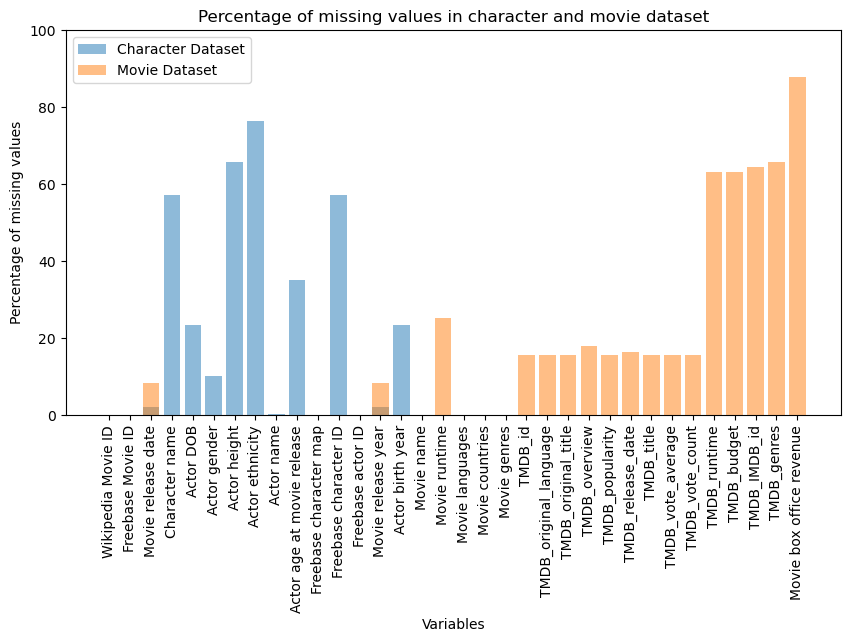

In [43]:
# Calculate percentage of missing values for each attribute
character_nan_percentages = character_metadata.isna().mean() * 100
movie_nan_percentages = movie_metadata.isna().mean() * 100

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the character dataset NaN percentages
ax.bar(character_nan_percentages.index, character_nan_percentages, label='Character Dataset', alpha=0.5)

# Plot the movie dataset NaN percentages
ax.bar(movie_nan_percentages.index, movie_nan_percentages, label='Movie Dataset', alpha=0.5)

ax.set_ylim(0,100)
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage of missing values')
ax.set_title('Percentage of missing values in character and movie dataset')
ax.legend()
plt.xticks(rotation=90)
plt.show()

As we can see, there is a lot of missing values for some of the attributes. Especially 'Movie box office revenue' has a lot of missing values (around 90%), but we will try to work around this by adding more values, if possible.

Some character attributes like height and ethnicity are also missing.

# Start Emma

We filter the data so that movies with less than 4 ratings are taken out

TMDB

In [46]:
get_min_and_max(df=character_metadata, variable_name='TMDB_vote_average', no_min=5, no_max=5)

KeyError: 'TMDB_vote_average'

In [49]:
#condition = (movie_metadata['TMDB_vote_average'] > 1)
movie_metadata[movie_metadata['TMDB_vote_average'>1]]
movie_metadata['TMDB_vote_average']

TypeError: '>' not supported between instances of 'str' and 'int'

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1836.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:31:19   Log-Likelihood:            -1.6186e+05
No. Observations:               68943   AIC:                         3.237e+05
Df Residuals:                   68941   BIC:                         3.237e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -23.8624      0

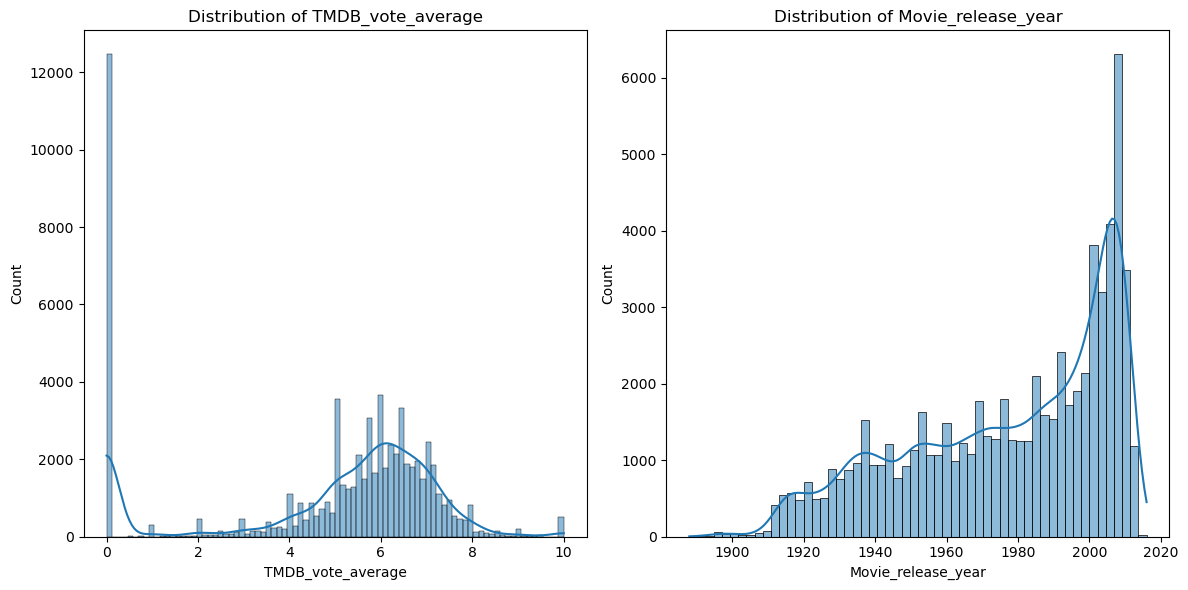

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


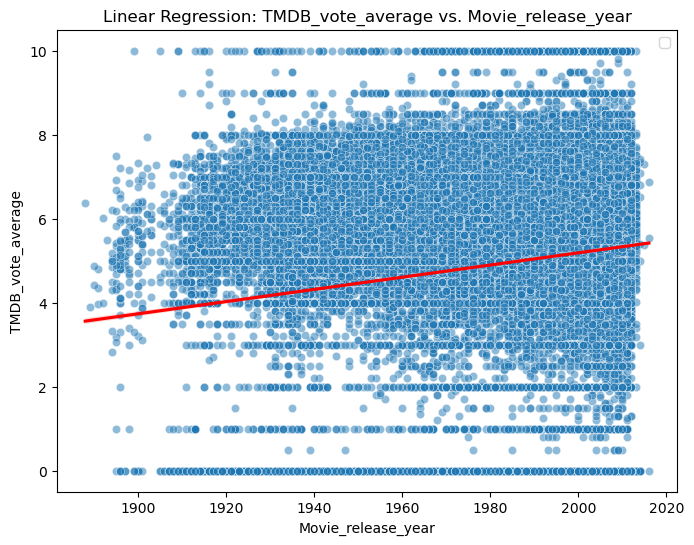

In [ ]:
import statsmodels.formula.api as smf
# Filter
columns_to_filter = ["TMDB_vote_average", "Movie release year"]

# Filter NaN values from specific columns
movie_metadata_filtered = movie_metadata.dropna(subset=columns_to_filter)
movie_metadata_filtered = movie_metadata_filtered.reset_index(drop=True)
movie_metadata_filtered.columns = movie_metadata_filtered.columns.str.replace(' ', '_')

# Declares the model
mod = smf.ols(formula='''TMDB_vote_average ~ Movie_release_year''', data=movie_metadata_filtered)


# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()

# Print thes summary output provided by the library.
print(res.summary())
# Plot the distribution of y and x
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(movie_metadata_filtered["TMDB_vote_average"], kde=True)
plt.title("Distribution of TMDB_vote_average")

plt.subplot(1, 2, 2)
sns.histplot(movie_metadata_filtered["Movie_release_year"], kde=True)
plt.title("Distribution of Movie_release_year")

plt.tight_layout()
plt.show()

# Plot the linear regression line and regression points
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Movie_release_year", y="TMDB_vote_average", data=movie_metadata_filtered, alpha=0.5)
sns.regplot(x="Movie_release_year", y="TMDB_vote_average", data=movie_metadata_filtered, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

plt.title("Linear Regression: TMDB_vote_average vs. Movie_release_year")
plt.xlabel("Movie_release_year")
plt.ylabel("TMDB_vote_average")
plt.legend()
plt.show()
